# kNN

## Criação do dataset

In [13]:
# Função para gerar datasets fakes
from sklearn.datasets import make_blobs

# Importa a biblioteca gráfica
import matplotlib.pyplot as plt

# Importa a biblioteca numérica
import numpy as np

In [14]:
# Criação do dataset
centros = [[2, 3], [5, 5]]
n_classes = len(centros)

dados, labels = make_blobs(n_samples=100, # número de amostras
                           centers=np.array(centros), # array com os centros
                           random_state=1) # seed aleatória

In [3]:
dados

array([[1.47182825, 1.92703138],
       [4.88955297, 4.38263794],
       [5.52057634, 3.85565861],
       [4.8190797 , 4.39607937],
       [7.19069973, 3.10363908],
       [5.79280687, 4.37646927],
       [4.73378149, 5.03261455],
       [2.12182127, 4.12948391],
       [2.04221375, 3.58281521],
       [5.24879916, 4.70335885],
       [6.16033857, 5.36949272],
       [1.80816445, 2.11237104],
       [5.01740941, 3.87798127],
       [5.04366899, 4.77368576],
       [4.18557541, 1.60350366],
       [5.23249456, 5.68255141],
       [1.30833925, 2.60324647],
       [5.50318481, 6.29322588],
       [5.80186103, 5.0465673 ],
       [3.72744124, 5.31354772],
       [5.49521132, 4.82529684],
       [2.51292982, 2.70190716],
       [3.74481176, 2.2387931 ],
       [5.52946532, 5.13770121],
       [5.07782113, 5.61838026],
       [1.69379599, 3.82797464],
       [2.12015895, 3.61720311],
       [2.3190391 , 2.75062962],
       [3.76994186, 5.5505375 ],
       [1.87710977, 2.06423057],
       [2.

In [4]:
labels

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [5]:
dados[labels==0]

array([[1.47182825, 1.92703138],
       [2.12182127, 4.12948391],
       [2.04221375, 3.58281521],
       [1.80816445, 2.11237104],
       [4.18557541, 1.60350366],
       [1.30833925, 2.60324647],
       [2.51292982, 2.70190716],
       [3.74481176, 2.2387931 ],
       [1.69379599, 3.82797464],
       [2.12015895, 3.61720311],
       [2.3190391 , 2.75062962],
       [1.87710977, 2.06423057],
       [2.30017032, 2.64775015],
       [3.65980218, 3.74204416],
       [3.19891788, 3.18515642],
       [1.32933771, 3.37756379],
       [2.42349435, 3.07734007],
       [3.46210794, 0.93985929],
       [2.18656139, 3.41005165],
       [0.89938082, 4.14472371],
       [3.13162939, 4.51981682],
       [1.32875387, 2.9873354 ],
       [2.90085595, 2.31627214],
       [2.23009474, 3.76201118],
       [2.19091548, 5.10025514],
       [1.65614632, 3.04359686],
       [1.82757179, 2.12214158],
       [1.24560206, 4.25286816],
       [1.77767186, 2.79924193],
       [2.28558733, 3.88514116],
       [3.

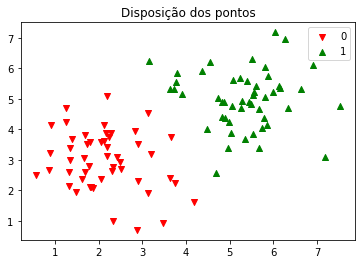

In [6]:
# Desenha os pontos no gráfico
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

cores = ['red', 'green']
markers = ['v', '^']

for i in range(n_classes):
    ax.scatter(dados[labels==i, 0],
               dados[labels==i, 1],
               marker=markers[i],
               color=cores[i], 
               label=str(i))

ax.set_title('Disposição dos pontos')
ax.legend()

plt.show()

## Separação do dataset em treino e teste


In [18]:
# Porcentagem da divisão do dataset
corte = int(dados.shape[0] * 0.7)

# Embaralha o dataset
np.random.seed(1)
np.random.shuffle(dados)

np.random.seed(1)
np.random.shuffle(labels)

# Separa em dois conjuntos
treino_X = dados[:corte]
teste_X = dados[corte:]

treino_y = labels[:corte]
teste_y = labels[corte:]

array([[1.87710977, 2.06423057],
       [5.49521132, 4.82529684],
       [4.86355526, 4.88094581],
       [3.76994186, 5.5505375 ],
       [2.48851815, 2.92442829],
       [5.40349164, 5.59357852],
       [2.90085595, 2.31627214],
       [1.80816445, 2.11237104],
       [1.25284171, 4.6924546 ],
       [5.5627611 , 5.24073709],
       [7.52832571, 4.75136522],
       [3.19891788, 3.18515642],
       [2.51292982, 2.70190716],
       [5.07782113, 5.61838026],
       [1.65614632, 3.04359686],
       [4.48290554, 4.00297317],
       [1.62471505, 2.36126959],
       [1.73211192, 3.53035547],
       [2.05080775, 2.36300435],
       [2.19829972, 3.11900865],
       [5.35054598, 3.68771659],
       [6.27375593, 6.96710175],
       [1.79110577, 3.58662319],
       [3.90508815, 5.16938243],
       [6.16033857, 5.36949272],
       [2.42349435, 3.07734007],
       [5.79280687, 4.37646927],
       [2.3190391 , 2.75062962],
       [0.89938082, 4.14472371],
       [5.52946532, 5.13770121],
       [5.

In [8]:
list(dados)

[array([1.47182825, 1.92703138]),
 array([4.88955297, 4.38263794]),
 array([5.52057634, 3.85565861]),
 array([4.8190797 , 4.39607937]),
 array([7.19069973, 3.10363908]),
 array([5.79280687, 4.37646927]),
 array([4.73378149, 5.03261455]),
 array([2.12182127, 4.12948391]),
 array([2.04221375, 3.58281521]),
 array([5.24879916, 4.70335885]),
 array([6.16033857, 5.36949272]),
 array([1.80816445, 2.11237104]),
 array([5.01740941, 3.87798127]),
 array([5.04366899, 4.77368576]),
 array([4.18557541, 1.60350366]),
 array([5.23249456, 5.68255141]),
 array([1.30833925, 2.60324647]),
 array([5.50318481, 6.29322588]),
 array([5.80186103, 5.0465673 ]),
 array([3.72744124, 5.31354772]),
 array([5.49521132, 4.82529684]),
 array([2.51292982, 2.70190716]),
 array([3.74481176, 2.2387931 ]),
 array([5.52946532, 5.13770121]),
 array([5.07782113, 5.61838026]),
 array([1.69379599, 3.82797464]),
 array([2.12015895, 3.61720311]),
 array([2.3190391 , 2.75062962]),
 array([3.76994186, 5.5505375 ]),
 array([1.8771

In [19]:
def kNN(k, p):
    
    # Calcula a distância de p com todos os pontos de treino_X
    for q in treino_X:
        ...

    # Ordena a lista de pontos pela distancia - ordem crescrente

    # Seleciona os k primeiros pontos

    # Verifica qual label apareceu com a maior frequencia

    # Retorna o label com maior frequencia


In [21]:
# Avaliação do kNN
k = 3

predicao = []
for p, l in zip(teste_X, teste_y):
    label = kNN(k, p)
    predicao.append(label)

print(predicao)


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [ ]:
a = [1, 2, 3, 4]
b = ['a', 'b', 'c', 'd']

for i in range(len(a)):
    print(a[i], b[i])

for x, y in zip(a, b):
    print(x, y)